<hr style="height:10px"> 
 
<div class='container2'>
	<div style='padding: 0 7em 2em 0em;'>
	<h1>Trabalho de Inteligência Artificial</h1>
    <h3> <a href="https://github.com/amandakouchi">Amanda Kouchi</a> &#x25CF; <a href="https://github.com/biarog">Beatriz Rogers</a> &#x25CF; <a href="https://github.com/matteoavan">Matteo Savan</a> &#x25CF; <a href="https://github.com/RaulYKomai">Raul Y. Komai</a>
	</div>
</div>


 <hr style="height:5px"> 

    
<h2>Algoritmos e Avaliação em Agrupamento</h2>

## Introdução

Neste *notebook*, exploramos três métodos de agrupamento: K-Médias, Single-Link e Complete-Link; e o Índice Rand. Cada um desses algoritmos, todos implementados em Python, aplica uma abordagem diferente de organização de dados em grupos, o que influencia tanto na forma como os clusters são definidos quanto na interpretação que podemos ter dos resultados obtidos. 
	
O objetivo desse projeto, referente à matéria de Inteligência Artificial da professora Drª Katti Faceli, é construir e aplicar os algoritmos aos datasets fornecidos, avaliando a qualidade das partições resultantes por meio do Índice Rand Ajustado, comparando-os com as partições reais.

---

## Recursos Necessários

Para este *notebook*, deve ser utilizado o `Python 3.6` ou superior com as seguintes bibliotecas externas, que deverão ser instaladas:

* [`matplotlib`](versão 3.9.2 ou superior): construção e exibição de gráficos variados
* [`numpy`](versão 2.1 ou superior): manipulação de dados em formato de vetores e matrizes
* [`pandas`](versão 2.2.2 ou superior): manipulação de dados em formato de tabelas
* [`sklearn`](versão x.x ou superior): completar
* [`seaborn`]versão x.x ou superior): completar

A biblioteca [`os`](https://docs.python.org/3/library/os.html), para realizar tarefas específicas ao Sistema Operacional, também será utilizada. Por fazer parte da [Biblioteca Padrão de Python](https://docs.python.org/pt-br/3/library/), sua instalação não é necessária.

Serão utilizados também os conjuntos de dados disponibilizados junto com este *notebook*, que se encontram no diretório `datasets`, em formato de arquivo `.txt`.

In [74]:
## Imports
from matplotlib import pyplot as plt
import numpy as np
import os
import pandas as pd
from sklearn import cluster 
from sklearn.cluster import KMeans
from scipy.spatial import distance_matrix
import seaborn as sns
import sys

%matplotlib inline

DATASETS_DIR = 'datasets'

In [75]:
## Função auxiliar para carregar dados
def load_dataset(dataset_name):
    dataset = pd.read_csv(os.path.join(DATASETS_DIR, dataset_name+'.txt'), sep='\t', index_col = 0)
    return dataset

In [76]:
## Função auxiliar para plottar os dados de entrada
def plot_entry_data(data) -> None:
    X = data[['d1', 'd2']]
    plt.scatter(X["d1"],X["d2"], c="red")
    plt.xlabel("d1")
    plt.ylabel("d2")
    plt.show()

In [77]:

## Funcao auxiliar para definir o dataframe apos a agregacao
def create_df(data, clusters):
    df = pd.DataFrame(data)
    df.columns = ["d1","d2"]
    df["cluster"] = clusters
    
    return df

In [78]:

## Função auxiliar para plottar após funcao de agregacao
def plot_grouped_data(df, n_clusters) -> None:
    cores = sns.color_palette()[0:n_clusters]
    df = df.sort_values("sample_label")
    sns.scatterplot(data = df, x=df["d1"], y=df["d2"], hue=df["cluster"], palette=cores)
    plt.show()

In [79]:

## Funcao auxiliar de exportar arquivo
def export_dataframe(df, n_group, n_arquivo) -> None :
    select = ['sample_label', 'cluster']
    select = [x for x in df.columns if x in select]
    export = df[select]
    export.to_csv(n_arquivo + '_' + n_group + '.csv')

---
## K-médias

O K-Médias busca minimizar a soma das distâncias quadradas entre os pontos de dados e o centróide do cluster ao qual pertencem. O algoritmo começa escolhendo k centróides iniciais, que podem ser selecionados aleatoriamente, e então itera entre atribuir cada ponto ao centróide mais próximo e recalcular os centróides dos clusters formados. O processo continua até que os centróides se estabilizem ou até que o número máximo de iterações seja atingido. 

O nosso algoritmo recebe como entrada um arquivo texto com o conjunto de dados, o número de clusters desejado e o número de iterações que o algoritmo deverá executar. A saída produzida é um arquivo com uma partição do conjunto de dados no mesmo formato que o da partição real.

In [80]:
## Função de distância
def distancia(a,b):
    return np.square(np.sum((a-b)**2)) 

In [81]:
## Entrada de dados
maxiter = 2

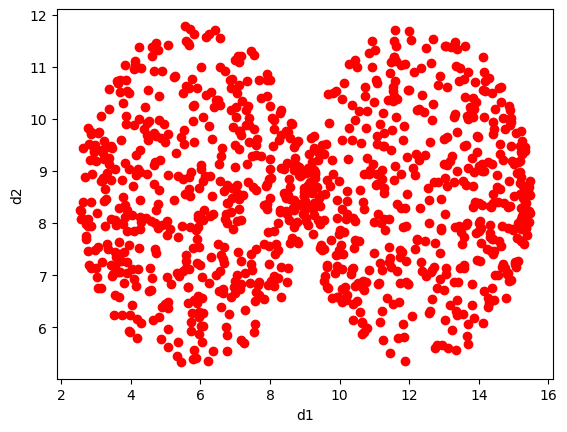

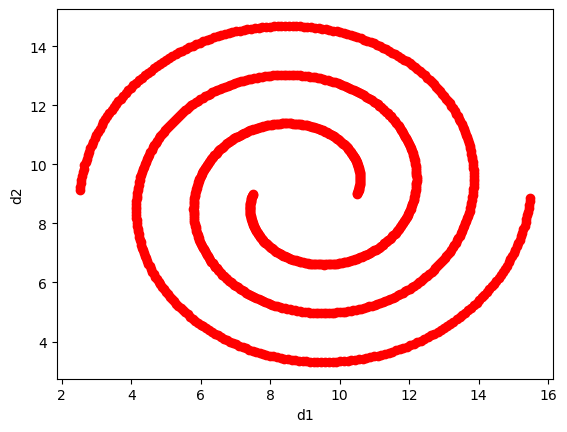

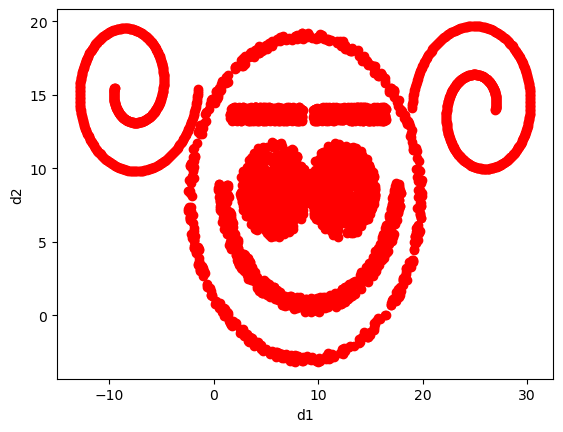

In [82]:
## Entrada das bases de dados
globs, spiral, monkey = load_dataset('c2ds3-2g'), load_dataset('c2ds1-2sp'), load_dataset('monkey')
dados = [globs, spiral, monkey]
plot_entry_data(data=dados[0])
plot_entry_data(data=dados[1])
plot_entry_data(data=dados[2])
plt.show()

In [83]:
## Função de iniciar centróides
def initiate_centroids(k,dset):
    centroides = dset.sample(k)
    return centroides

## Iniciar centróides
X0 = dados[0][['d1', 'd2']]
X1 = dados[1][['d1', 'd2']]
X2 = dados[2][['d1', 'd2']]

In [84]:
## Atribuição de das amostras aos centróides
def centroid_assignation(dset, centroids):
    k = centroids.shape[0]
    n = dset.shape[0]
    assignation = []

    for obs in range(n):
        # Calcular distâncias
        distances = np.array([])
        for centroid in range(k):
            err = distancia(centroids.iloc[centroid, :], dset.iloc[obs,:])
            distances = np.append(distances, err)

        # Pegar o centróide mais próximo
        nearest_centroid =  np.where(distances==np.amin(distances))[0].tolist()[0]

        # Adicionar os valores às suas listas correspondentes
        assignation.append(nearest_centroid)

    return assignation

In [85]:
## Função do K-médias
def kmeans(dset, k, maxiter):
    working_dset = dset.copy()
    
    centroids = initiate_centroids(k, dset)

    for i in range(maxiter):
        working_dset['centroid'] = centroid_assignation(working_dset, centroids) 
        centroids = working_dset.groupby('centroid').agg('mean').reset_index(drop = True)

    working_dset['centroid'] = centroid_assignation(working_dset, centroids)
    centroids = working_dset.groupby('centroid').agg('mean').reset_index(drop = True)
    return working_dset['centroid'], centroids

In [86]:
## Execução do K-médias
np.random.seed(86)
centroidsg = []
centroidsp = []
centroidsm = []
for i in range(2,13):
    if i <= 5:
        X0['centroid' + str(i)], centroidsg =  kmeans(X0[['d1','d2']], i, maxiter)
        X1['centroid' + str(i)], centroidsp =  kmeans(X1[['d1','d2']], i, maxiter)
    if i >= 5:
        X2['centroid' + str(i)], centroidsm =  kmeans(X2[['d1','d2']], i, maxiter)

In [87]:
## Plotar após k-médias
df0 = pd.DataFrame(X0)
df1 = pd.DataFrame(X1)
df2 = pd.DataFrame(X2)

def kmeans_plot(df): 
    for i in range(2,6):
        cores = sns.color_palette()[0:i]
        sns.scatterplot(data = df0, x=df0["d1"], y=df0["d2"], hue=df0["centroid" + str(i)], palette=cores)
        plt.show() 
    
    for i in range(2,6):
        cores = sns.color_palette()[0:i]
        sns.scatterplot(data = df1, x=df1["d1"], y=df1["d2"], hue=df1["centroid" + str(i)], palette=cores)
        plt.show()    
    
    for i in range(5,13):
        cores = sns.color_palette('Paired')[0:i]
        sns.scatterplot(data = df2, x=df2["d1"], y=df2["d2"], hue=df2["centroid" + str(i)], palette=cores)
        plt.show()

In [88]:
## Função auxiliar para exportar arquivos
def exportar(nome_arquivo, df, centroid):
    select_ = ['sample_label', centroid]
    select = [x for x in df.columns if x in select_]
    export = df[select]
    export.to_csv(nome_arquivo + '.csv')

In [90]:
## Exportar arquivos
for i in range(2,13):
    if i <= 5:
        exportar('Kmeans_glob'+str(i), df0, 'centroid'+str(i))
        exportar('Kmeans_spiral'+str(i), df1, 'centroid'+str(i))

    if i >= 5:
        exportar('Kmeans_monkee'+str(i), df2, 'centroid'+str(i))

---
## Single-Link

O Single-Link é um algoritmo hierárquico que forma clusters. Inicialmente, cada  dado é tratado como um cluster individual. Após iterar, há união dos dois clusters mais próximos em cada etapa, onde a proximidade é determinada pela menor distância entre qualquer par de pontos nos dois clusters.

O nosso algoritmo recebe como entrada um arquivo texto com o conjunto de dados kMin e kMax (2 e 5, respectivamente). A saída produzida é um ou mais arquivos, cada um com uma partição do conjunto de dados.

In [16]:
## Entrada de dados
numero_clusters = 5
nome_arquivo = 'c2ds3-2g'

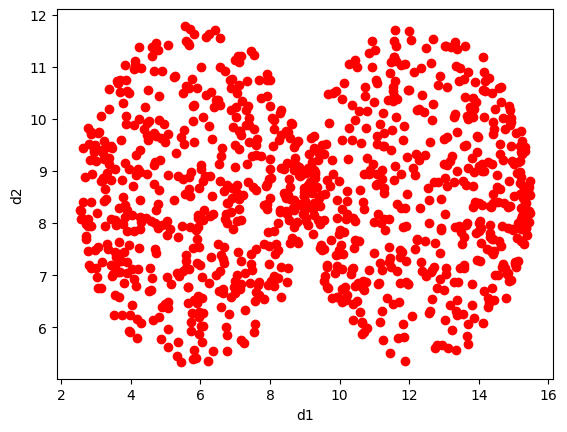

In [17]:
## Carregando dados e plottando grafico inicial
dados = load_dataset(nome_arquivo)
plot_entry_data(data=dados)

In [18]:
## Cálculo Matriz de Distância
matrix_despacial = distance_matrix(dados, dados, p=2)

In [19]:
## Função de Single Link
def single_link(m_distancias:np, n_clusters:int):
    single = [-1]*len(m_distancias)
    total_clusters = len(m_distancias)
    counter:int = 0
    cluster_id:int = -1
    
    if total_clusters > n_clusters:      
        while(total_clusters > n_clusters): 
            n_menos1 = 0
            line:int = 0
            column:int = 0
            
            cluster:bool = True
            
            shortest_dist = np.min(m_distancias[m_distancias>0])
            line = np.where(m_distancias == shortest_dist)[0][0]
            column = np.where(m_distancias == shortest_dist)[1][0]
            
            if single[line] < 0 and single[column] < 0:
                cluster = False
            
            if cluster:
                
                if single[line] >= 0:
                    cluster_id = -single[line] -1
                elif single[column] >= 0:
                    cluster_id = -single[column] -1
                
                matrix_despacial[column][line] = matrix_despacial[line][column] = cluster_id
                
                idx_column = idx_line = -1
                for idx_n, n in enumerate(single):
                    if n == single[column] and idx_n != column and n > -1:
                        idx_column = idx_n
                        single[idx_column] = -cluster_id - 1
                        matrix_despacial[idx_column][column] = matrix_despacial[column][idx_column] = cluster_id
                        matrix_despacial[idx_column][line] = matrix_despacial[line][idx_column] = cluster_id
                    elif n == single[line] and idx_n != line and n > -1:
                        idx_line = idx_n
                        single[idx_line] = -cluster_id - 1
                        matrix_despacial[idx_line][column] = matrix_despacial[column][idx_line] = cluster_id
                        matrix_despacial[idx_line][line] = matrix_despacial[line][idx_line] = cluster_id
                    if idx_column > -1 and idx_line > -1:
                        matrix_despacial[idx_line][idx_column] = matrix_despacial[idx_column][idx_line] = cluster_id
                
                single[line] = single[column] = -cluster_id - 1

            else :
                m_distancias[column][line] = m_distancias[line][column] = -counter - 1
                single[line] = single[column] = counter
                counter += 1

            ## Atualizar distâncias
            for idx_x in range(len(m_distancias)):
                if m_distancias[line][idx_x] <= m_distancias[column][idx_x] and m_distancias[line][idx_x] > 0:
                    m_distancias[column][idx_x] = m_distancias[idx_x][column] = m_distancias[line][idx_x]
                elif m_distancias[line][idx_x] > m_distancias[column][idx_x] and m_distancias[column][idx_x] > 0:
                    m_distancias[line][idx_x] = m_distancias[idx_x][line] = m_distancias[column][idx_x]
            
            ## Contar quantos elementos "estão sem cluster"
            for x in single:
                if x == -1:
                    n_menos1 += 1
            
            ## Contar "quantos clusters tem"
            total_clusters = len(set(single)) + n_menos1
            
            if n_menos1 > 0:
                total_clusters -= 1
                
            if total_clusters == n_clusters:
                break
    

    ## Atribuir cluster para os "que não tem cluster"
    for idx_n, n in enumerate(single):
        if n == -1:
            single[idx_n] = max(single) + 1

    return single

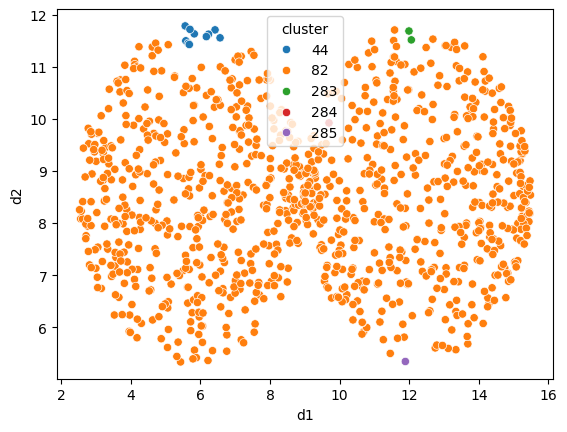

In [20]:
single = single_link(matrix_despacial, numero_clusters)
dataframe = create_df(data=dados, clusters=single)
plot_grouped_data(df=dataframe, n_clusters=numero_clusters)

C:\Users\matte\AppData\Local\Temp\ipykernel_23752\1705649196.py:5: UserWarning: The palette list has more values (5) than needed (1), which may not be intended.
  sns.scatterplot(data = df, x=df["d1"], y=df["d2"], hue=df["cluster"], palette=cores)


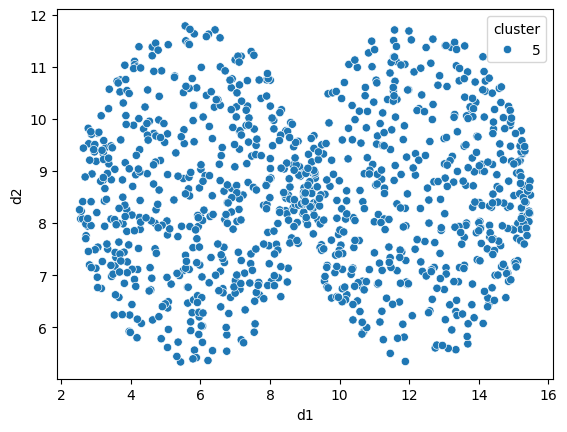

In [21]:

df = create_df(dados, numero_clusters)
plot_grouped_data(df, numero_clusters)
export_dataframe(df, 'single_link', nome_arquivo)

---
## Complete-Link

O Complete-Link, assim como o Single-Link, é um algoritmo hierárquico aglomerativo. Mas, em vez de considerar a menor distância entre os pontos dos clusters, o Complete-Link considera a maior distância entre os pontos de dois clusters.

O nosso algoritmo recebe como entrada um arquivo texto com o conjunto de dados kMin e kMax (2 e 5, respectivamente). A saída produzida é um ou mais arquivos, cada um com uma partição do conjunto de dados.

In [22]:
## Entrada de dados
numero_clusters = 2
nome_arquivo = 'c2ds1-2sp'
#nome_arquivo = 'testando'

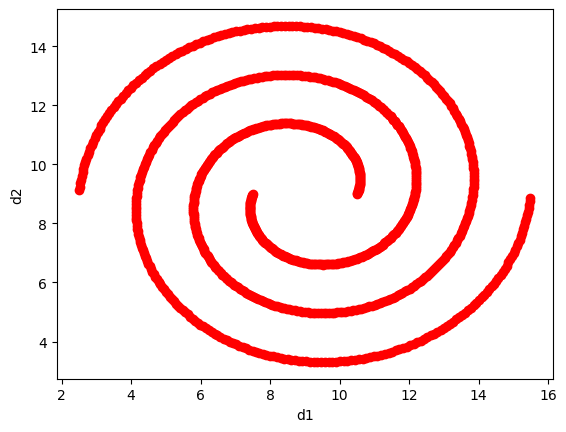

In [23]:
## Carregando dados e plottando grafico inicial
dados = load_dataset(nome_arquivo)
plot_entry_data(data=dados)

In [24]:

## Cálculo Matriz de Distância
matrix_despacial = distance_matrix(x=dados.values, y=dados.values)

In [25]:
## Função de Complete Link
def complete_link(m_distancias:np, n_clusters:int):
    complete = [-1]*len(m_distancias)
    total_clusters = len(m_distancias)
    counter:int = 0
    cluster_id:int = -1
    
    if total_clusters > n_clusters:      
        while(total_clusters > n_clusters): 
            n_menos1 = 0
            line:int = 0
            column:int = 0
            
            cluster:bool = True
            
            shortest_dist = np.min(m_distancias[m_distancias>0])
            line = np.where(m_distancias == shortest_dist)[0][0]
            column = np.where(m_distancias == shortest_dist)[1][0]
            
            if complete[line] < 0 and complete[column] < 0:
                cluster = False
            
            ###############
            if cluster:
            # Instancias onde o menor valor é repetido (no caso de ter um cluster sempre vai ter)
                tds_instancias = list(set(np.where(m_distancias == shortest_dist)[0]))
                
                # Garantindo que sejam pegos 2 clusters distintos 
                prim_cluster_a_se_juntar = complete[tds_instancias[0]] # seria o a
                seg_cluster_a_Se_juntar:int # isso seria o z do exemplo
                
                for n in tds_instancias:
                    if complete[n] != prim_cluster_a_se_juntar:
                        seg_cluster_a_Se_juntar = complete[n]
                        break
                
                # Criando um vetor somente com os idxs dos clusters a serem utilizados
                instancias_usadas = []
                
                for n in tds_instancias:
                    if complete[n] == prim_cluster_a_se_juntar:
                        instancias_usadas.append(n)
                        if complete[n] == -1:
                            break
                
                for n in tds_instancias:
                    if complete[n] == seg_cluster_a_Se_juntar:
                        instancias_usadas.append(n)
                        if complete[n] == -1:
                            break
                               
                
                # Pega o maior valor da tabela entre as colunas de cada instancia
                for col in range(m_distancias.shape[1]):
                    maior = max(m_distancias[instancias_usadas, col])
                    m_distancias[instancias_usadas, col] = maior
                    m_distancias[col, instancias_usadas] = maior
                
                for n in instancias_usadas:
                    if prim_cluster_a_se_juntar != -1:
                        complete[n] = prim_cluster_a_se_juntar
                    else:
                        complete[n] = seg_cluster_a_Se_juntar
                    
                    matrix_despacial[n][instancias_usadas] = -complete[n] -1   
            ###############

            else :
                m_distancias[column][line] = m_distancias[line][column] = -counter - 1
                complete[line] = complete[column] = counter
                counter += 1

            ## Atualizar distâncias  ## Atualizar aki para o single-link
            for idx_x in range(len(m_distancias)): ## idx_x in range(tamanho da tabela)
                if m_distancias[line][idx_x] >= m_distancias[column][idx_x] and m_distancias[column][idx_x] > 0:
                    m_distancias[column][idx_x] = m_distancias[idx_x][column] = m_distancias[line][idx_x] ## É x mesmo?
                elif m_distancias[line][idx_x] < m_distancias[column][idx_x] and m_distancias[line][idx_x] > 0:
                    m_distancias[line][idx_x] = m_distancias[idx_x][line] = m_distancias[column][idx_x] #m_distancias[column][idx_x]
            
            ## Contar quantos elementos "estão sem cluster"
            for x in complete:
                if x == -1:
                    n_menos1 += 1
            
            ## Contar "quantos clusters tem"
            total_clusters = len(set(complete)) + n_menos1
            
            if n_menos1 > 0:
                total_clusters -= 1
                
            if total_clusters == n_clusters:
                break
    

    ## Atribuir cluster para os "que não tem cluster"
    for idx_n, n in enumerate(complete):
        if n == -1:
            complete[idx_n] = max(complete) + 1

    return complete

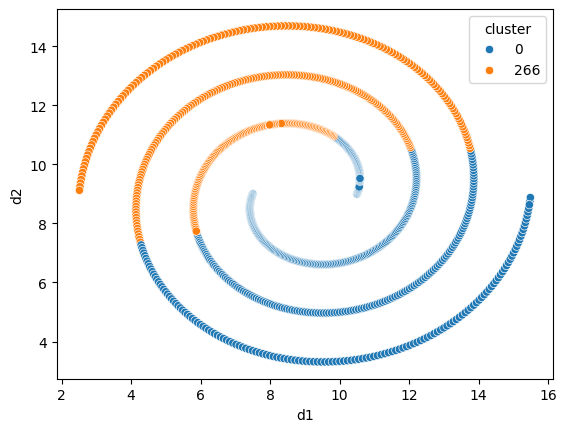

In [26]:
complete = complete_link(matrix_despacial, numero_clusters)
dataframe = create_df(data=dados, clusters=complete)

plot_grouped_data(df=dataframe, n_clusters=numero_clusters)

In [27]:
export_dataframe(df, 'complete_link', nome_arquivo)

---
## S-Rand
Uma etapa muito importante quando se trata de agrupamento é a validação externa. Ela busca validar as partições obtidas pelos algoritmos em comparação com a partição real dos dados que é esperada. Para isto, utiliza-se o Índice Rand (RI).

O Indice Rand é um dos indicativos mais tradicionais de qualidade de agrupamento de elementos. Ele faz uma comparação par-a-par entre os objetos obtidos com algum algoritmo de agrupamento e o agrupamento real esperado, verificando se eles estão no mesmo cluster ou não. Dadas as partições A e B, com os objetos de A sendo representados por $a$ e objetos de B por $b$, o RI é calculado da seguinte maneira:

$$RI(A, B) = \frac{(x_1 + x_4)}{M}$$
sendo $x_1$ e $x_4$:
* $x_1$ a quantidade de pares de objetos $a$,$b$ em que $a$ e $b$ pertencem ao mesmo cluster em $A$ e $B$ 
* $x_4$ a quantidade de pares de objetos $a$,$b$ em que ambos $a$ e $b$ não pertencem ao mesmo cluster em $A$ e $B$ 

Com o passar do tempo sentiu-se a necessidade de utilizar uma variação do Indice Rand que pudesse lidar com o acaso, e aí surgiu o Indice Rand Corrigido (ARI). O ARI varia no intervalo [–1, 1], e o valor 1 indica que as partições que estão sendo comparadas são idênticas enquanto que valores próximos de 0 ou ainda menores indicam que a semelhança entre as partições se deve ao acaso. Esta variação está implementada na função adjusted_rand_score(), pertencente à biblioteca scikit-learn (sklearn), especificamente no módulo sklearn.metrics.cluster:

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score

In [28]:
# abaixo é o que devemos fazer para um arquivo mas devemos fazer para os outros:
def indice_rand_corrigido(arquivo_particao_real:str, arquivo_particao_obtida:str):
    # pegando os dados:
    caminho_particao_real = 'datasets/' + arquivo_particao_real + '.clu'
    caminho_particao_obtida =  arquivo_particao_obtida + '.csv'

    resultado_correto = open(caminho_particao_real, 'r') #abrindo o arquivo para leitura. Aqui tem o arquivo com o agrupamento real
    vetor_resultado_correto = []
    resultado_alcancado = open(caminho_particao_obtida, 'r') #abrindo o arquivo para leitura. Aqui tem o arquivo com o agrupamento que conseguimos em algum dos agrupamento que implementamos
    vetor_resultado_alcancado = []

    conteudo = resultado_alcancado.readline() #aqui lemos só para não pegar aquela primeira linha com a legenda das colunas

    # coletando os dados do arquivo do que se espera:
    while(True):
        conteudo = resultado_correto.readline() #lê linha

        if (not conteudo): #se alcançar o final do arquivo
            break #pare

        numero_cluster = conteudo[len(conteudo)-2] #descontamos 1 do \n e descontamos 1 para garantir a posição correta
        vetor_resultado_correto.append(numero_cluster)

    # coletando os dados do arquivo do que se alcançou:
    while(True):
        conteudo = resultado_alcancado.readline()
        if (not conteudo):
            break
        numero_cluster = conteudo[len(conteudo)-2]  
        vetor_resultado_alcancado.append(numero_cluster)

    #para testar o vetores criados:
    #print("PRINTANDO OS VETORES:")
    #print(vetor_resultado_correto)
    #print(vetor_resultado_alcancado)

    rand = adjusted_rand_score(vetor_resultado_correto, vetor_resultado_alcancado)
    return str(rand)
    

indice Rand alcançado: 0.459131706378294


In [ ]:
# coloque indice_rand_corrigido("nome_arquivo_com_partições_esperadas", "nome_arquivo_com_partições_alcançadas")
print("clusters arquivo algoritmo ARI")
print("2 globulars K-Médias ", indice_rand_corrigido("c2ds3-2gReal", "Kmeans_glob2"))
print("3 globulars K-Médias ", indice_rand_corrigido("c2ds3-2gReal", "Kmeans_glob3"))
print("4 globulars K-Médias ", indice_rand_corrigido("c2ds3-2gReal", "Kmeans_glob4"))
print("5 globulars K-Médias ", indice_rand_corrigido("c2ds3-2gReal", "Kmeans_glob5"))

print()

print("clusters arquivo algoritmo ARI")
print("2 spirals K-Médias ", indice_rand_corrigido("c2ds1-2spReal", "Kmeans_spiral2"))
print("3 spirals K-Médias ", indice_rand_corrigido("c2ds1-2spReal", "Kmeans_spiral3"))
print("4 spirals K-Médias ", indice_rand_corrigido("c2ds1-2spReal", "Kmeans_spiral4"))
print("5 spirals K-Médias ", indice_rand_corrigido("c2ds1-2spReal", "Kmeans_spiral5"))

print()

print("clusters arquivo algoritmo ARI")
print("5 monkey K-Médias ", indice_rand_corrigido("monkeyReal1", "Kmeans_monkee5"))
print("6 monkey K-Médias ", indice_rand_corrigido("monkeyReal1", "Kmeans_monkee6"))
print("7 monkey K-Médias ", indice_rand_corrigido("monkeyReal1", "Kmeans_monkee7"))
print("8 monkey K-Médias ", indice_rand_corrigido("monkeyReal1", "Kmeans_monkee8"))
print("9 monkey K-Médias ", indice_rand_corrigido("monkeyReal1", "Kmeans_monkee9"))
print("10 monkey K-Médias ", indice_rand_corrigido("monkeyReal1", "Kmeans_monkee10"))
print("11 monkey K-Médias ", indice_rand_corrigido("monkeyReal1", "Kmeans_monkee11"))
print("12 monkey K-Médias ", indice_rand_corrigido("monkeyReal1", "Kmeans_monkee12"))

---
## Execução e Qualidade das Partições dos Algoritmos

Nesta seção, vamos executar os algoritmos implementados (K-Médias, Single-Link e Complete-Link) e avaliar a qualidade das suas respectivas partições para cada um dos três arquivos de dados.
A análise será sustentada, principalmente, pelo cálculo do Índice Rand Corrigido.

K-Médias:

Foram calculados os Índices para cada um dos diferentes números de clusters para cada um dos datasets fornecidos.


Vamos começar apresentando e executando o K-Médias para o dataset 'c2ds1-2sp'. Para esse conjunto de dados, os clusters (k) variam de 2 a 5. 


In [29]:
#chamar a função do k-médias para c2ds1, variando o k entre 2 e 5

A seguir, os Índices Rand para cada valor de k (2 a 5) com o dataset 'c2ds1-2sp'.

In [1]:
import pandas as pd

tabela = pd.read_csv("rand_kmeans_spiral.csv")

display(tabela)

FileNotFoundError: [Errno 2] No such file or directory: 'rand_kmeans_spiral.csv'

Assim, podemos ver que os valores do índice Rand foram perto/longe de 1, o que indica que o algoritmo tem resultados bons/ruins para o conjunto de dados fornecidos. Isso se fortalece ao observar os gráficos gerados pelo algoritmo acima. Desse modo, dizemos que esse tipo de distribuição (não)é ideal para o uso desse algoritmo de agrupamento. 

Agora, vamos executar o K-Médias para o dataset 'c2ds3-2g'. Para esse conjunto de dados, os clusters (k) variam de 2 a 5.

In [ ]:
#chamar a função do k-médias para c2ds3, variando o k entre 2 e 5

A seguir, os Índices Rand para cada valor de k (2 a 5) com o dataset 'c2ds3-2g'.

In [ ]:
import pandas as pd

tabela = pd.read_csv("rand_kmeans_glob.csv")

display(tabela)

Assim, podemos ver que os valores do índice Rand foram perto/longe de 1, o que indica que o algoritmo tem resultados bons/ruins para o conjunto de dados fornecidos. Isso se fortalece ao observar os gráficos gerados pelo algoritmo acima. Desse modo, dizemos que esse tipo de distribuição (não)é ideal para o uso desse algoritmo de agrupamento. 

Por fim, vamos executar o K-Médias para o dataset 'monkey'. Para esse conjunto de dados, os clusters (k) variam de 5 a 12.

In [ ]:
#chamar função k-medias para monkey, variando o k entre 5 e 12

A seguir, os Índices Rand para cada valor de k (5 a 12) com o dataset 'monkey'.

In [ ]:
import pandas as pd

tabela = pd.read_csv("rand_kmeans_monkee.csv")

display(tabela)

Assim, podemos ver que os valores do índice Rand foram perto/longe de 1, o que indica que o algoritmo tem resultados bons/ruins para o conjunto de dados fornecidos. Isso se fortalece ao observar os gráficos gerados pelo algoritmo acima. Desse modo, dizemos que esse tipo de distribuição (não)é ideal para o uso desse algoritmo de agrupamento. 

Single-Link:

Foram calculados os Índices para cada um dos diferentes números de clusters para cada um dos datasets fornecidos.


Vamos começar apresentando e executando o Single-Link para o dataset 'c2ds1-2sp'. Para esse conjunto de dados, os clusters (k) variam de 2 a 5. 

In [ ]:
#chamar a função do single-link para c2ds1, variando o k entre 2 e 5

A seguir, os Índices Rand para cada valor de k (2 a 5) com o dataset 'c2ds1-2sp'.

In [ ]:
import pandas as pd

tabela = pd.read_csv("rand_singlelinkage_spiral.csv")

display(tabela)

Assim, podemos ver que os valores do índice Rand foram perto/longe de 1, o que indica que o algoritmo tem resultados bons/ruins para o conjunto de dados fornecidos. Isso se fortalece ao observar os gráficos gerados pelo algoritmo acima. Desse modo, dizemos que esse tipo de distribuição (não)é ideal para o uso desse algoritmo de agrupamento. 

Agora, vamos executar o Single-Link para o dataset 'c2ds3-2g'. Para esse conjunto de dados, os clusters (k) variam de 2 a 5.


In [ ]:
#chamar a função do single-link para c2ds3, variando o k entre 2 e 5

A seguir, os Índices Rand para cada valor de k (2 a 5) com o dataset 'c2ds3-2g'.

In [ ]:
import pandas as pd

tabela = pd.read_csv("rand_singlelinkage_glob.csv")

display(tabela)

Assim, podemos ver que os valores do índice Rand foram perto/longe de 1, o que indica que o algoritmo tem resultados bons/ruins para o conjunto de dados fornecidos. Isso se fortalece ao observar os gráficos gerados pelo algoritmo acima. Desse modo, dizemos que esse tipo de distribuição (não)é ideal para o uso desse algoritmo de agrupamento. 

Por fim, vamos executar o Single-Link para o dataset 'monkey'. Para esse conjunto de dados, os clusters (k) variam de 5 a 12.

In [ ]:
#chamar função single-link para monkey, variando o k entre 5 e 12

A seguir, os Índices Rand para cada valor de k (5 a 12) com o dataset 'monkey'.

In [ ]:
import pandas as pd

tabela = pd.read_csv("rand_singlelinkage_monkee.csv")

display(tabela)

Assim, podemos ver que os valores do índice Rand foram perto/longe de 1, o que indica que o algoritmo tem resultados bons/ruins para o conjunto de dados fornecidos. Isso se fortalece ao observar os gráficos gerados pelo algoritmo acima. Desse modo, dizemos que esse tipo de distribuição (não)é ideal para o uso desse algoritmo de agrupamento. 



Complete-Link:

Foram calculados os Índices para cada um dos diferentes números de clusters para cada um dos datasets fornecidos.


Vamos começar apresentando e executando o Complete-Link para o dataset 'c2ds1-2sp'. Para esse conjunto de dados, os clusters (k) variam de 2 a 5. 

In [ ]:
#chamar a função do complete-link para c2ds1, variando o k entre 2 e 5

A seguir, os Índices Rand para cada valor de k (2 a 5) com o dataset 'c2ds1-2sp'.

In [ ]:
import pandas as pd

tabela = pd.read_csv("rand_completelinkage_spiral.csv")

display(tabela)

Assim, podemos ver que os valores do índice Rand foram perto/longe de 1, o que indica que o algoritmo tem resultados bons/ruins para o conjunto de dados fornecidos. Isso se fortalece ao observar os gráficos gerados pelo algoritmo acima. Desse modo, dizemos que esse tipo de distribuição (não)é ideal para o uso desse algoritmo de agrupamento. 

Agora, vamos executar o Complete-Link para o dataset 'c2ds3-2g'. Para esse conjunto de dados, os clusters (k) variam de 2 a 5.


In [ ]:
#chamar a função do single-link para c2ds3, variando o k entre 2 e 5

A seguir, os Índices Rand para cada valor de k (2 a 5) com o dataset 'c2ds3-2g'.

In [ ]:
import pandas as pd

tabela = pd.read_csv("rand_completelinkage_glob.csv")

display(tabela)

Assim, podemos ver que os valores do índice Rand foram perto/longe de 1, o que indica que o algoritmo tem resultados bons/ruins para o conjunto de dados fornecidos. Isso se fortalece ao observar os gráficos gerados pelo algoritmo acima. Desse modo, dizemos que esse tipo de distribuição (não)é ideal para o uso desse algoritmo de agrupamento. 

Por fim, vamos executar o Complete-Link para o dataset 'monkey'. Para esse conjunto de dados, os clusters (k) variam de 5 a 12.

In [ ]:
#chamar função complete-link para monkey, variando o k entre 5 e 12

A seguir, os Índices Rand para cada valor de k (5 a 12) com o dataset 'monkey'.

In [ ]:
import pandas as pd

tabela = pd.read_csv("rand_completelinkage_monkee.csv")

display(tabela)

Assim, podemos ver que os valores do índice Rand foram perto/longe de 1, o que indica que o algoritmo tem resultados bons/ruins para o conjunto de dados fornecidos. Isso se fortalece ao observar os gráficos gerados pelo algoritmo acima. Desse modo, dizemos que esse tipo de distribuição (não)é ideal para o uso desse algoritmo de agrupamento. 

--- 
## Comparação com Notebook do roteiro 3
Após plotar todos os gráficos para cada um dos algoritmos e datasets, usando, também, o Índice Rand para avaliar a qualidade das partições obtidas pelo grupo, finalmente podemos comparar aquilo que obtivemos com as partições reais providas pelo notebook do roteiro 3.
Aqui, iremos discutir e analisar as diferenças e semelhanças de cada conjunto de resultados obtidos.


---
## Conclusão

falar sobre como foi o comportamneto dos diferentes algoritmos com os dados, se seguiu o esperado ou não, a relação do ARI com o que encontramos, objetivo geral do trabalho 